In [1]:
%cd /sound-spaces

/sound-spaces


In [2]:
import os
os.environ['HABITAT_SIM_LOG'] = 'sensor=VeryVerbose'

In [3]:
# !ls /opt/conda/envs/soundspaces/lib/python3.9/site-packages/ha*

In [4]:
# !pip list | tail -n +3 | xargs -exec pip show

In [5]:
# %%capture
import os
import quaternion
import habitat_sim.sim
import numpy as np
from scipy.io import wavfile

HI


/opt/conda/envs/soundspaces/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [43]:
dataset = 'gibson'
backend_cfg = habitat_sim.SimulatorConfiguration()
if dataset == 'mp3d':
    backend_cfg.scene_id = "data/scene_datasets/mp3d_example/17DRP5sb8fy/17DRP5sb8fy.glb"
    # IMPORTANT: missing this file will lead to load the semantic scene incorrectly
    backend_cfg.scene_dataset_config_file = "data/scene_datasets/mp3d/mp3d.scene_dataset_config.json"
else:
    backend_cfg.scene_id = "data/scene_datasets/gibson_data/gibson/Oyens.glb"
    # IMPORTANT: missing this file will lead to load the semantic scene incorrectly
    backend_cfg.scene_dataset_config_file = "data/scene_datasets/gibson_data/gibson/gibson_semantic.scene_dataset_config.json"
backend_cfg.load_semantic_mesh = True
backend_cfg.enable_physics = False
agent_config = habitat_sim.AgentConfiguration()
cfg = habitat_sim.Configuration(backend_cfg, [agent_config])
sim = habitat_sim.Simulator(cfg)

# set navmesh path for searching for navigable points
if dataset == 'mp3d':
    sim.pathfinder.load_nav_mesh(os.path.join(f"data/scene_datasets/mp3d/UwV83HsGsw3/UwV83HsGsw3.navmesh"))
else:
    sim.pathfinder.load_nav_mesh(os.path.join(f"data/scene_datasets/gibson_data/gibson/Oyens.navmesh"))

audio_sensor_spec = habitat_sim.AudioSensorSpec()
audio_sensor_spec.uuid = "audio_sensor"
audio_sensor_spec.enableMaterials = True
audio_sensor_spec.channelLayout.channelType = habitat_sim.sensor.RLRAudioPropagationChannelLayoutType.Binaural
audio_sensor_spec.channelLayout.channelCount = 1
# audio sensor location set with respect to the agent
audio_sensor_spec.position = [0.0, 1.5, 0.0]  # audio sensor has a height of 1.5m
audio_sensor_spec.acousticsConfig.sampleRate = 48000
# whether indrect (reverberation) is present in the rendered IR
audio_sensor_spec.acousticsConfig.indirect = True
sim.add_sensor(audio_sensor_spec)

audio_sensor = sim.get_agent(0)._sensors["audio_sensor"]
audio_sensor.setAudioMaterialsJSON("data/mp3d_material_config.json")
print("asdfasdfasdf")

asdfasdfasdf
[16:48:32:701394]:[Debug]:[Sensor] AudioSensor.cpp(24)::AudioSensorSpec : [Audio]  AudioSensorSpec constructor


[16:48:32:363385]:[Warning]:[Metadata] SceneDatasetAttributes.cpp(107)::addNewSceneInstanceToDataset : Dataset : 'gibson_semantic' : Lighting Layout Attributes 'no_lights' specified in Scene Attributes but does not exist in dataset, so creating default.


[16:48:32:701585]:[Debug]:[Sensor] AudioSensor.cpp(32)::sanityCheck : [Audio]  SanityCheck the audio sensor spec
[16:48:32:701597]:[Debug]:[Sensor] AudioSensor.cpp(46)::AudioSensor : [Audio]  AudioSensor constructor
[16:48:32:701601]:[Debug]:[Sensor] AudioSensor.cpp(32)::sanityCheck : [Audio]  SanityCheck the audio sensor spec
[16:48:32:701605]:[Debug]:[Sensor] AudioSensor.cpp(48)::AudioSensor : [Audio]  Acoustics Configs :  sampleRate:48000, frequencyBands:4, directSHOrder:3, indirectSHOrder:1, threadCount:1, updateDt:0.02, irTime:4, unitScale:1, globalVolume:0.25, listenerRadius:0.1, indirectRayCount:5000, indirectRayDepth:200, sourceRayCount:200, sourceRayDepth:10, maxDiffractionOrder:10, direct:1, indirect:1, diffraction:1, transmission:1, temporalCoherence:0, meshSimplification:0, dumpWaveFiles:0, enableMaterials:1, writeIrToFile:0
[16:48:32:701617]:[Debug]:[Sensor] AudioSensor.cpp(50)::AudioSensor : [Audio]  Channel Layout :  channelType:3, channelCount:1
[16:48:32:701621]:[Debug

In [44]:
def try_getattr(o,k):
    try:
        return getattr(o,k)
    except TypeError:
        return 
def get_obj_data(o):
    return {k: try_getattr(o, k) for k in dir(o) if not k.startswith('__') and not callable(try_getattr(o, k))}

In [45]:
# get_obj_data(sim)

In [46]:
# sta=sim.get_stage_initialization_template()
# get_obj_data(sta)

In [47]:
# sampled navigable point is on the floor
source_pos = sim.pathfinder.get_random_navigable_point()
print('Sample source location: ', source_pos)

Sample source location:  [2.6282403  0.01496243 6.8579893 ]


In [48]:
audio_sensor.setAudioSourceTransform(source_pos + np.array([0, 0, 1.5])) # add 1.5m to the height calculation 
agent = sim.get_agent(0)
new_state = sim.get_agent(0).get_state()
new_state.position = np.array(source_pos + np.array([2, 0, 0]))
new_state.sensor_states = {}
agent.set_state(new_state, True)
ir = np.array(sim.get_sensor_observations()["audio_sensor"])

print(ir.shape)

# # one a category is not found in the material mapping file, the default acoustic material will be used.

about to run the simulation
[16:48:36:760480]:[Debug]:[Sensor] AudioSensor.cpp(81)::setAudioSourceTransform : [Audio]  Setting the audio source position :  Vector(2.62824, 0.0149624, 8.35799) ]
simulation ran
(2, 52436)
[16:48:36:760952]:[Debug]:[Sensor] AudioSensor.cpp(91)::setAudioListenerTransform : [Audio]  Setting the agent transform : position [ Vector(4.62824, 1.51496, 6.85799) ], rotQuat[ Vector(1, 0, 2.45858e-05, 0) ]
[16:48:36:760967]:[Debug]:[Sensor] AudioSensor.cpp(279)::createAudioSimulator : [Audio]  Create audio simulator iteration:  0
CreateContext: Context created
[16:48:36:761149]:[Debug]:[Sensor] AudioSensor.cpp(115)::runSimulation : [Audio]  Running the audio simulator
[16:48:36:761158]:[Debug]:[Sensor] AudioSensor.cpp(120)::runSimulation : [Audio]  New initialization, will upload geometry and add the source at position :  Vector(2.62824, 0.0149624, 8.35799)
[16:48:36:761165]:[Debug]:[Sensor] AudioSensor.cpp(127)::runSimulation : [Audio]  Loading semantic scene
[16:

Material for category 'bottle' was not found. Using default material instead.
Material for category 'refrigerator' was not found. Using default material instead.
Material for category 'couch' was not found. Using default material instead.
Material for category 'vase' was not found. Using default material instead.
Material for category 'book' was not found. Using default material instead.
Material for category 'bowl' was not found. Using default material instead.
Material for category 'oven' was not found. Using default material instead.
Material for category 'toothbrush' was not found. Using default material instead.


::getObservationSpace : [Audio]  getObservationSpace -> [ChannelCount] :  2 , [SampleCount] :  52436


In [49]:
ir.shape

(2, 52436)

In [50]:
# # check if the direct sound is present (source is visibile from the listener)
# audio_sensor.sourceIsVisible()

In [51]:
# # check the efficiency of rendering, outdoor would have a very low value, e.g. < 0.05, 
# # while a closed indoor room would have >0.95, and a room with some holes might be in the 0.1-0.8 range.
# # if the ray efficiency is low for an indoor environment, it indicates a lot of ray leak from holes
# # you should repair the mesh in this case for more accurate acoustic rendering
# audio_sensor.getRayEfficiency()

[16:48:55:753895]:[Debug]:[Sensor] AudioSensor.cpp(68)::~AudioSensor : [Audio]  Destroying the audio sensor
[16:48:55:763984]:[Debug]:[Sensor] Sensor.cpp(68)::~Sensor : Deconstructing Sensor


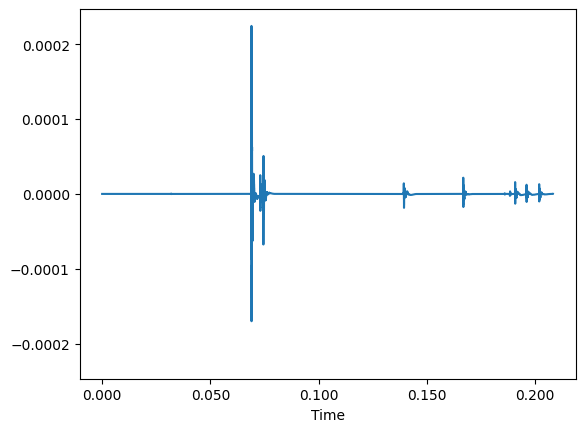

In [53]:
# plot the waveform of IR and show the audio
from librosa.display import waveshow, specshow
import IPython

waveshow(ir[0, :10000], sr=48000)
IPython.display.Audio(ir, rate=48000)

In [54]:
# one example for how to use IR data to get the reverberant speech
sr, vocal = wavfile.read('res/singing.wav')
print(sr, vocal.shape)
IPython.display.Audio(vocal, rate=sr)

48000 (233873,)


/tmp/ipykernel_26719/3675352108.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, vocal = wavfile.read('res/singing.wav')


In [55]:
from scipy.signal import fftconvolve

# convolve the vocal with IR
convolved_vocal = np.array([fftconvolve(vocal, ir_channel) for ir_channel in ir]) 
IPython.display.Audio(convolved_vocal, rate=sr)

RT60 of the rendered IR is 0.4986 seconds


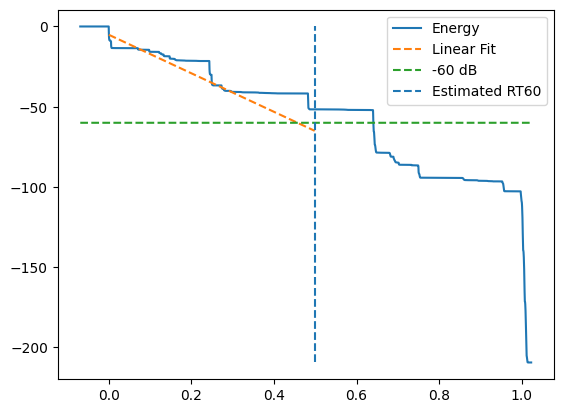

In [56]:
from pyroomacoustics.experimental.rt60 import measure_rt60

rt60 = measure_rt60(ir[0], sr, decay_db=30, plot=True)
print(f'RT60 of the rendered IR is {rt60:.4f} seconds')